In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [12]:

from configuration import *
from figure_estimation import *
from plotting_tools import *
from spikeinterface.sortingcomponents.benchmark.benchmark_motion_estimation import plot_error_map_several_benchmarks

import seaborn as sns

In [3]:
plt.rcParams.update({
    'font.size': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,

})

In [4]:
figure_folder = base_folder / 'figures' / 'estimation'
figure_folder.mkdir(exist_ok=True, parents=True)


extentions = ['png', 'pdf', 'tiff']

## load benchmark from disk

In [5]:
# this is quite long
all_benchmarks = {}
for drift_mode in drift_modes:
    for cells_position in cells_positions:
        for cells_rate in cells_rates:
            all_benchmarks[(drift_mode, cells_position, cells_rate)] = \
                load_benchmarks(drift_mode, cells_position, cells_rate)


## summary motion estimation errors

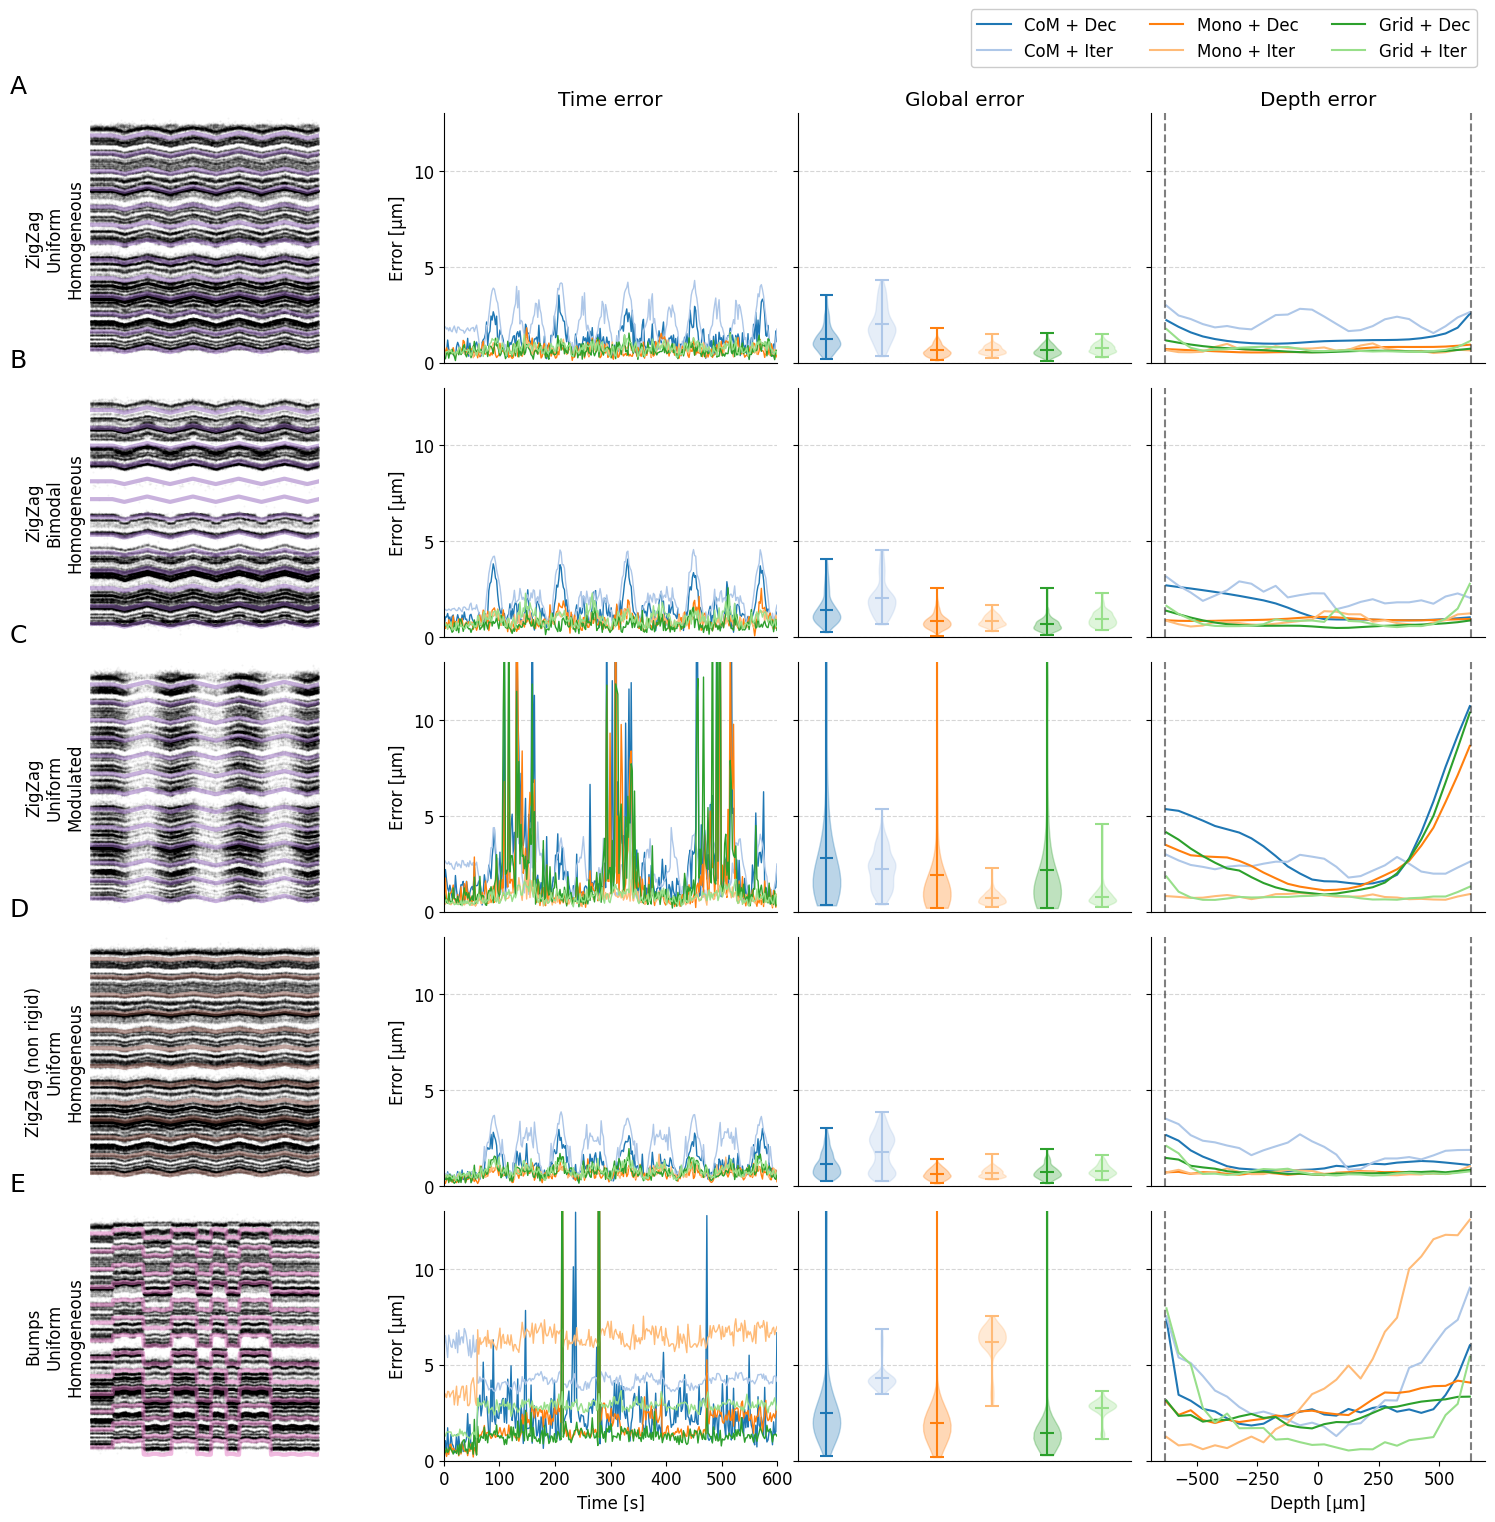

In [6]:
fig = plot_summary_errors_several_benchmarks(all_benchmarks, selected_keys, figsize=(18, 17.5))
for ext in extentions:
    fig.savefig(figure_folder / f'Figure4_summary_errors.{ext}')

## more drift results

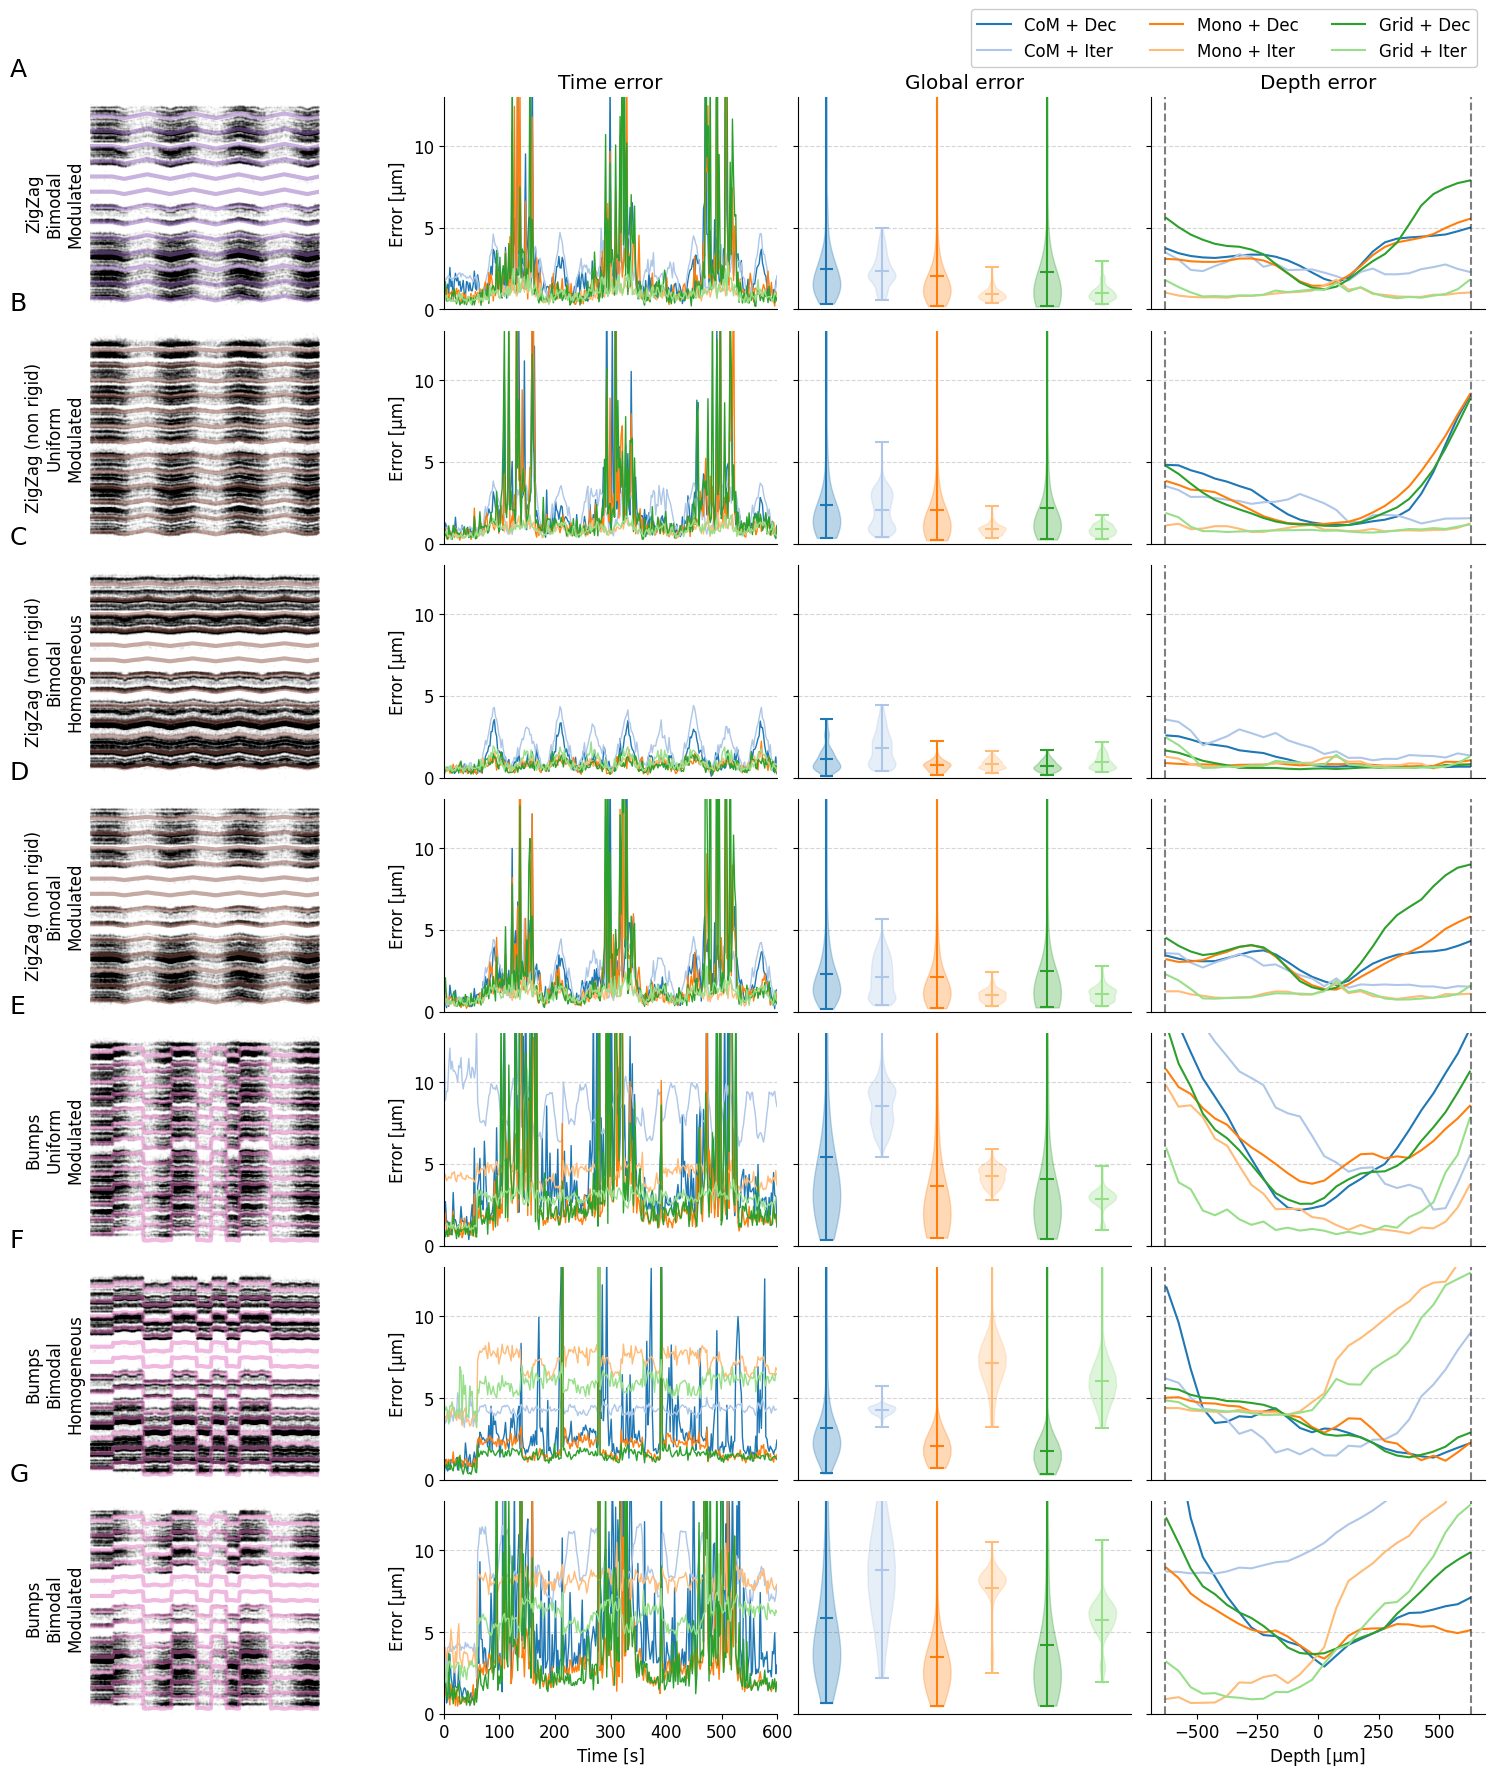

In [7]:
fig = plot_summary_errors_several_benchmarks(all_benchmarks, additional_keys, figsize=(18, 21))
for ext in extentions:
    fig.savefig(figure_folder / f'Figsupp2 more_summary_errors.{ext}')

## individual benchmark motion errors

In [8]:
all_benchmarks.keys()

dict_keys([('rigid', 'uniform', 'homogeneous'), ('rigid', 'uniform', 'modulated'), ('rigid', 'bimodal', 'homogeneous'), ('rigid', 'bimodal', 'modulated'), ('non-rigid', 'uniform', 'homogeneous'), ('non-rigid', 'uniform', 'modulated'), ('non-rigid', 'bimodal', 'homogeneous'), ('non-rigid', 'bimodal', 'modulated'), ('bumps', 'uniform', 'homogeneous'), ('bumps', 'uniform', 'modulated'), ('bumps', 'bimodal', 'homogeneous'), ('bumps', 'bimodal', 'modulated')])

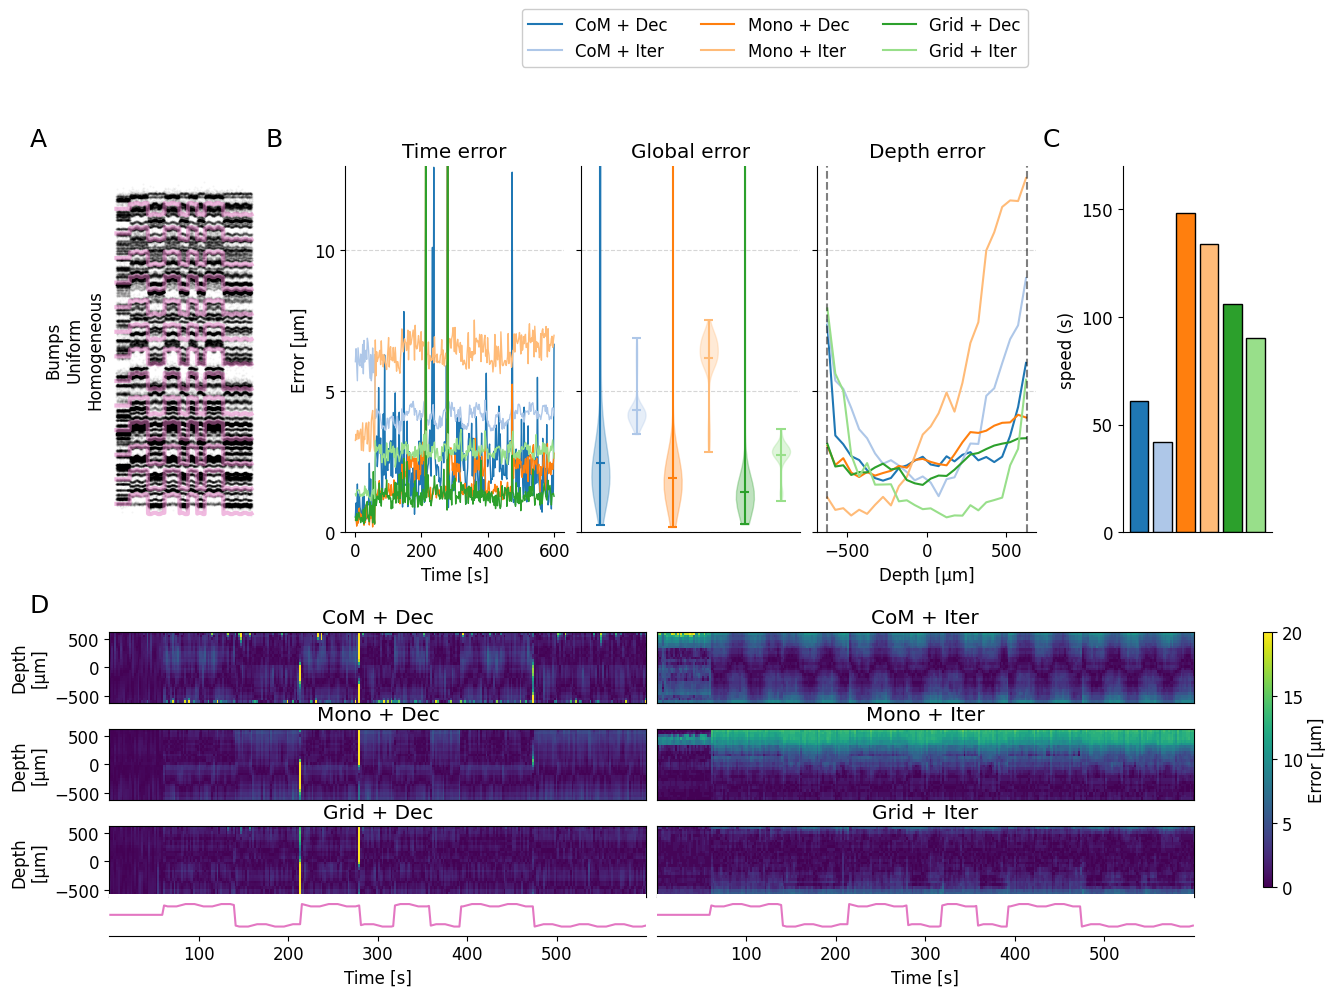

In [9]:
for key, benchmarks in all_benchmarks.items():
    if key != ('bumps', 'uniform', 'homogeneous'):
        continue
    label = drift_title(key)
    
    fig = plot_figure_individual_motion_benchmark(benchmarks, label=label, figsize=(15, 10))

    if key == ('bumps', 'uniform', 'homogeneous'):
        drift_mode, cells_position, cells_rate = key
        fig_name = f'Figure5 {probename}_{drift_mode}_{cells_position}_{cells_rate}'
        for ext in extentions:
            fig.savefig(figure_folder / f'{fig_name}.{ext}')


In [31]:
df = benchmarks_to_df(all_benchmarks)
df

,Drift signal,Depth distribution,Firing rate,Localization method,Inference method,time,depth,error,abs_error,log_error
0,ZigZag,Uniform,Homogeneous,center_of_mass,decentralized,1.0,-625.0,0.916831,0.916831,0.650673
1,ZigZag,Uniform,Homogeneous,center_of_mass,decentralized,1.0,-575.0,0.954644,0.954644,0.670208
2,ZigZag,Uniform,Homogeneous,center_of_mass,decentralized,1.0,-525.0,0.934360,0.934360,0.659777
3,ZigZag,Uniform,Homogeneous,center_of_mass,decentralized,1.0,-475.0,0.800873,0.800873,0.588272
4,ZigZag,Uniform,Homogeneous,center_of_mass,decentralized,1.0,-425.0,0.851039,0.851039,0.615747
...,...,...,...,...,...,...,...,...,...,...
7795,Bumps,Bimodal,Modulated,grid_convolution,iterative_template,599.0,425.0,8.454543,8.454543,2.246495
7796,Bumps,Bimodal,Modulated,grid_convolution,iterative_template,599.0,475.0,10.964641,10.964641,2.481956
7797,Bumps,Bimodal,Modulated,grid_convolution,iterative_template,599.0,525.0,10.964634,10.964634,2.481955
7798,Bumps,Bimodal,Modulated,grid_convolution,iterative_template,599.0,575.0,12.474762,12.474762,2.600818


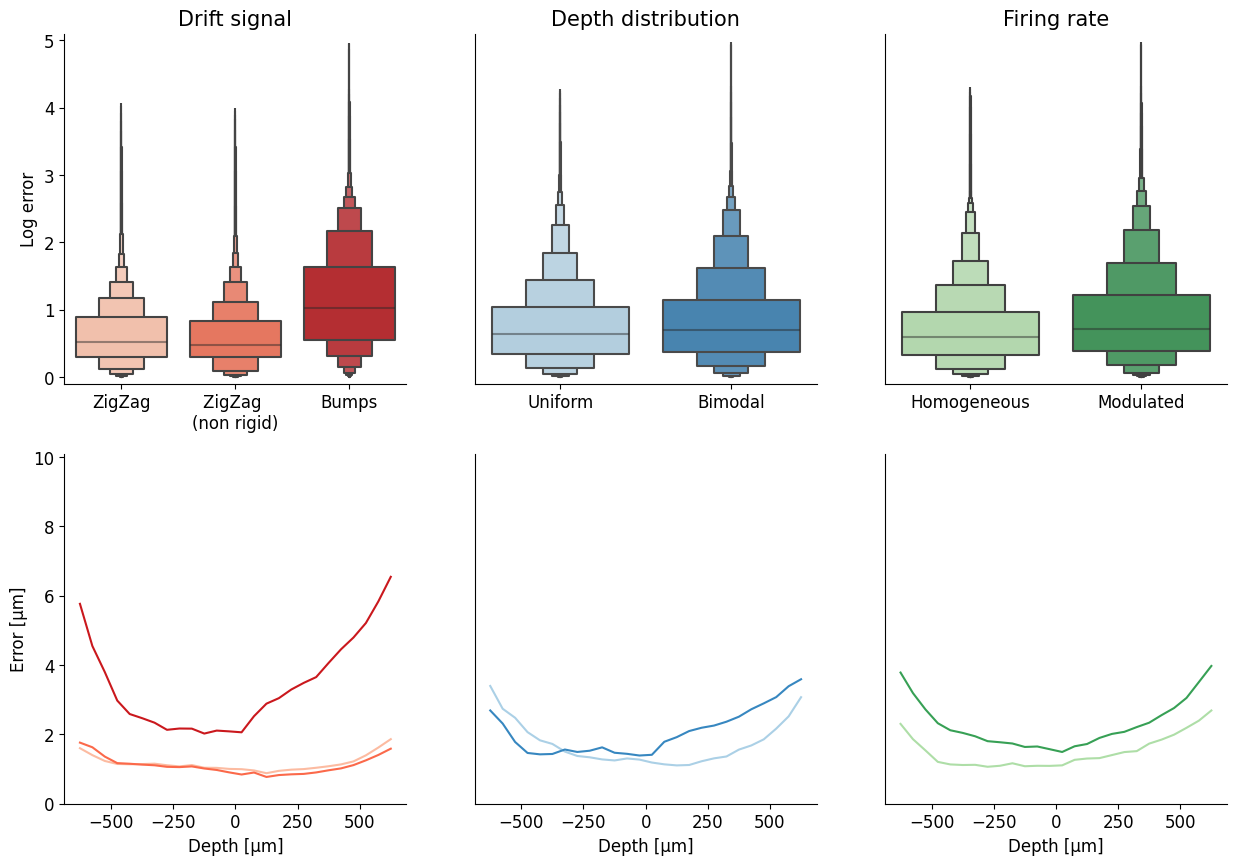

In [39]:
ncols = 3
nrows = 2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 10))

sns.boxenplot(data=df, x="Drift signal", y="log_error", ax=axs[0, 0], palette="Reds",  showfliers=False)
sns.boxenplot(data=df, x="Depth distribution", y="log_error", ax=axs[0, 1], palette="Blues", showfliers=False)
sns.boxenplot(data=df, x="Firing rate", y="log_error", ax=axs[0, 2], palette="Greens", showfliers=False)

# errorbar = "sd"
errorbar = None
err_style = "band"
sns.lineplot(data=df, x="depth", y="abs_error", hue="Drift signal", ax=axs[1, 0], 
             errorbar=errorbar,  err_style=err_style,
             palette="Reds", legend=False)
sns.lineplot(data=df, x="depth", y="abs_error", hue="Depth distribution", ax=axs[1, 1], 
             errorbar=errorbar, err_style=err_style,
             palette="Blues",  legend=False)
sns.lineplot(data=df, x="depth", y="abs_error",  hue="Firing rate", ax=axs[1, 2], 
             errorbar=errorbar, err_style=err_style,
             palette="Greens",  legend=False)


for row in range(nrows):
    for col in range(ncols):
        ax = axs[row, col]
        simpleaxis(ax)
            
        if row == 0:
            ax.set_xlabel("")
            ax.set_ylabel("Log error")
            ax.set_ylim(-0.1, 5.1)
            ax.set_title([
                "Drift signal",
                "Depth distribution",
                "Firing rate",
            ][col], fontsize=15)
        else:
            ax.set_xlabel("Depth [μm]")
            ax.set_ylabel("Error [μm]")
            ax.set_ylim(0, 10.1)

        if col != 0:
            ax.set_ylabel("")
            ax.set_yticks([])
        else:
            pass



fig_name = f'Figure3 global pooled errors'
for ext in extentions:
    fig.savefig(figure_folder / f'{fig_name}.{ext}')
